In [1]:
#######################
##  Library Imports  ##
#######################
import numpy as np
import h5py
import sys
import os
from numba import njit
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif']  = 'Computer Modern Roman'
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import getopt
from itertools import zip_longest
import multiprocessing as mprocs
import time as TIME
from subprocess import Popen, PIPE
from matplotlib.pyplot import cm
from functions import tc, import_data, sim_data, import_data, import_spectra_data, import_post_processing_data

In [2]:
in_dir = "/home/ecarroll/PhD/2D_Navier_Stokes/Data/Test/SIM_DATA_NAVIER_RK4_FULL_N[128,128]_T[0-100]_NU[0.000003]_CFL[0.90]_u0[DECAY_TURB_ALT]_TAG[Test-Test]/"
post_file_path = in_dir + "PostProcessing_HDF_Data_SECTORS[24]_KFRAC[0.75]_TAG[Test-Test].h5"

In [3]:
# -----------------------------------------
# # --------  Read In data
# -----------------------------------------
## Read in simulation parameters
sys_vars = sim_data(in_dir)

## Read in solver data
run_data = import_data(in_dir, sys_vars)

## Read in spectra data
# spec_data = import_spectra_data(in_dir, sys_vars)

## Read in post processing data
post_data = import_post_processing_data(post_file_path, sys_vars, 'file')

In [4]:
post_data.phase_order_C_theta.shape

(2001, 24)

In [8]:
R_k_t_avg = np.zeros((post_data.num_sect, ))
t = 0
for i in range(post_data.phase_order_C_theta.shape[0]):
    R_k_t_avg[:] += np.absolute(post_data.phase_order_C_theta[i, :])
    t += 1
    
R_k_t_avg /= t

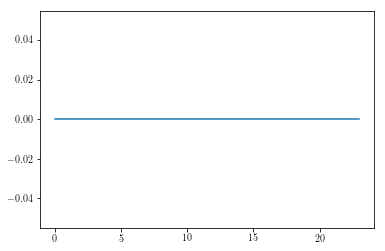

In [6]:
plt.figure()
plt.plot(R_k_t_avg[:])
plt.show()